In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from ISLP import load_data

# Check all the available styles
# print(plt.style.available)

# Remove grid lines
plt.style.use('seaborn-v0_8-white')

from tensorflow import keras 

In [36]:
data = keras.datasets.mnist.load_data()

help(keras.datasets.mnist.load_data)

# Check the shape of x_train and y_train
x_train, y_train = data[0]
x_test, y_test = data[1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# how do we know if the shapes are 3 dimensional or 2 dimensional?
# We can check the shape of the first image
# a 3 dimensional image will have a shape of (28, 28, 1) while a 2 dimensional image will have a shape of (28, 28) 
# in a 3 dimensional image, the last dimension is the number of channels. In this case, it is 1 because the image is grayscale
# the parameters in a shape tuple are (height, width, channels)
# (60000, 28, 28) means that there are 60000 images in the training set and each image has a shape of (28, 28) meaning it is a 2D image



Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
   

In [37]:
# Check the smallest and largest value in x_train and y_train
print(x_train.min())
print(x_train.max())
print(y_train.min())
print(y_train.max())

0
255
0
9


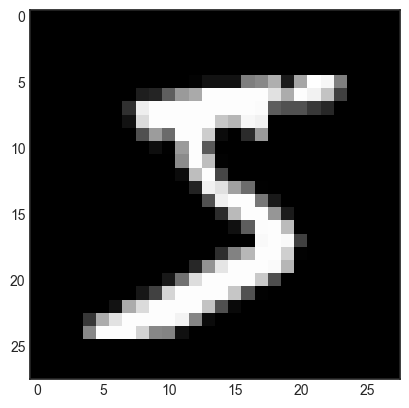

In [38]:
# plot the x_train[0] with imshow
plt.imshow(x_train[0], cmap='gray')

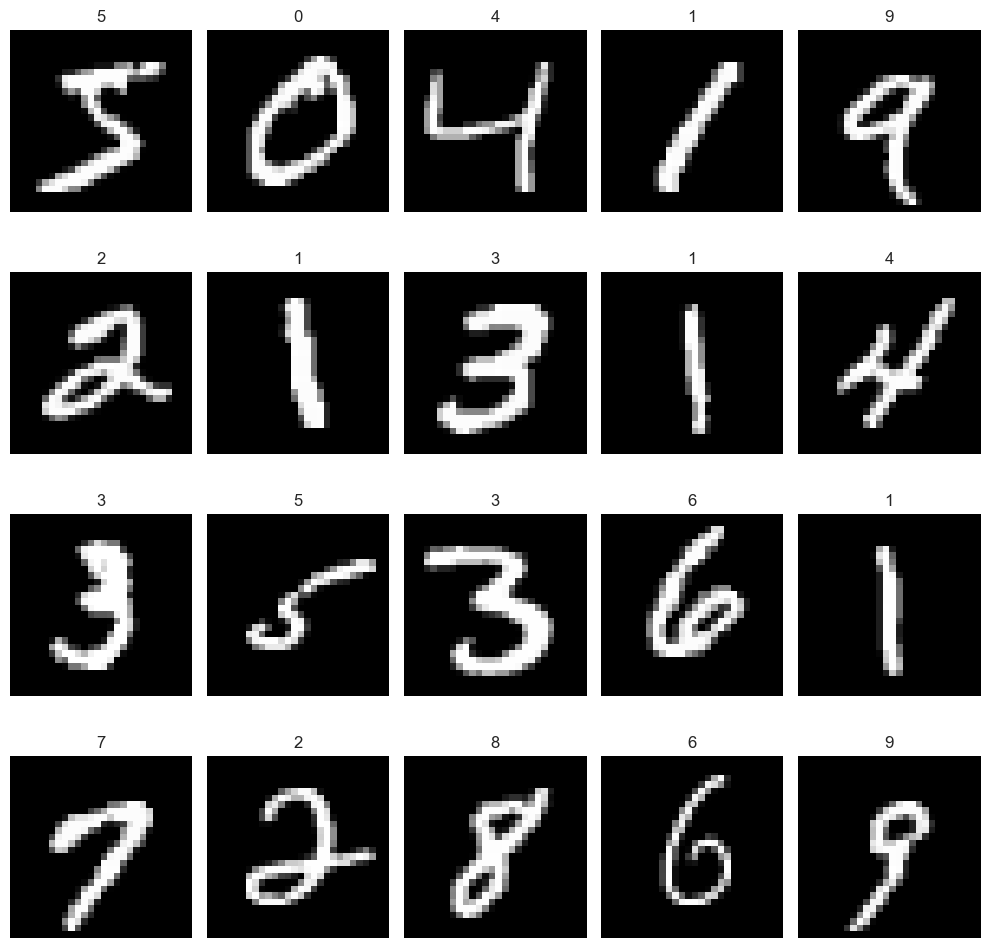

In [39]:
# plot 20 sample images
fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat): # flat is used to flatten the axes array meaning we can iterate over it
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off') # remove the axis
    ax.set_title(y_train[i])

plt.tight_layout()

In [40]:
# reshape the x_train and x_test to 2D
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


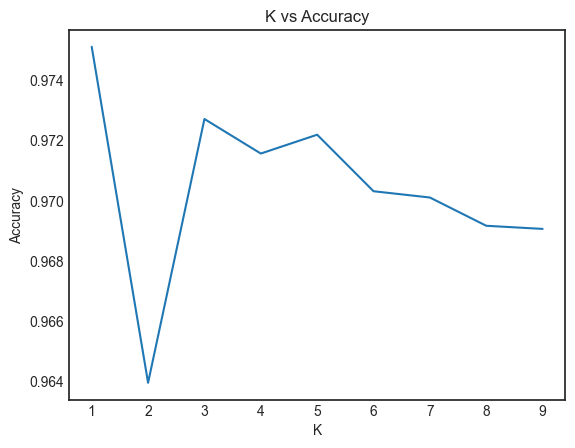

1
0.9690625


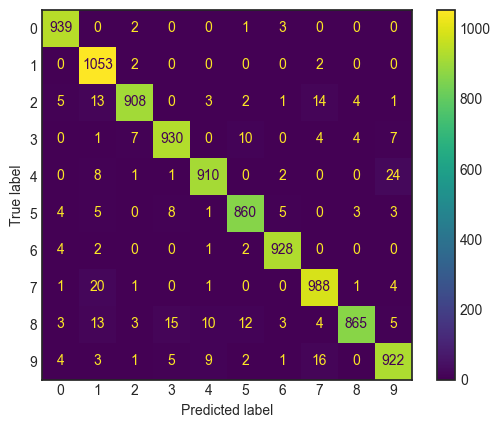

In [41]:
# do a train split on the x_train and y_train to get a validation set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.16, random_state=42)

# Choose the best K value
# create a list of k values

k_values = range(1, 10)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train1, y_train1)
    y_pred = knn.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

# choose the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(best_k)

# check the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

# plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()



              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



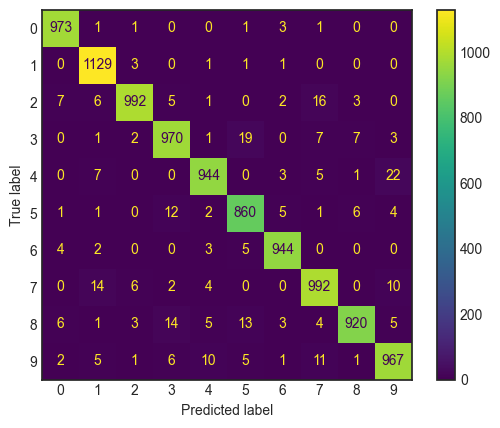

In [44]:
# fit the model with the best k value and predict the test set
# use the whole training set to fit the model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# do a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# precision is the number of true positives divided by the number of true positives and false positives
# recall is the number of true positives divided by the number of true positives and false negatives
# f1 score is the harmonic mean of precision and recall
# support is the number of actual occurrences of the class in the specified dataset
# accuracy is the number of correct predictions divided by the total number of predictions
# macro avg is the average of the unweighted mean per label
# weighted avg is the average of the support-weighted mean per label
# micro avg is the total number of true positives divided by the total number of true positives, false negatives and false positives
# highest proportionn of false negatives is by looking at the recall of the class with the lowest recall

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()
